In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [35]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None,
                        cov=0.1,
                        n_samples = N,
                        n_features=2,
                        n_classes=2,shuffle=True,
                        random_state=None
                        )
X, Y = gaussian_quantiles

In [36]:
Y = Y[:, np.newaxis]

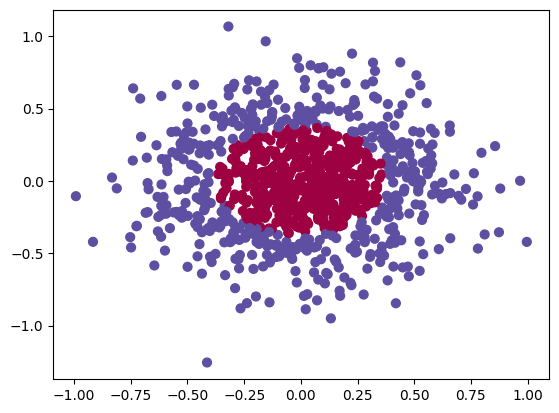

In [37]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

### Funciones de activación

In [39]:
def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

### Funcion de predida

In [40]:
def mse(y,y_hat,derivate=False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

In [41]:
def initialize_parameters_deep(layer_dims):
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for l in range(0, L-1):
        parameters['W' + str(l+1)] = (np.random.rand(layer_dims[l], layer_dims[l+1]) * 2) - 1
        parameters['b' + str(l+1)] = (np.random.rand(1, layer_dims[l+1]) * 2) - 1
    return parameters

In [42]:
layer_dims = [2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)

In [43]:
params

{'W1': array([[ 0.13306296,  0.84372495, -0.84235754, -0.77363736],
        [-0.75161219,  0.49135071,  0.4285691 , -0.20136942]]),
 'b1': array([[ 0.21670838, -0.39105021, -0.81463772, -0.03359218]]),
 'W2': array([[ 0.76089319,  0.08083916,  0.2268971 ,  0.18038167,  0.34194613,
         -0.52895308, -0.33660293, -0.08128593],
        [ 0.01300349,  0.08621152, -0.0867439 , -0.95941732, -0.25756952,
          0.899325  ,  0.72823228, -0.31796457],
        [ 0.47087837,  0.55347981,  0.59822255,  0.16190845,  0.59658948,
         -0.01970959,  0.12107497, -0.4449222 ],
        [ 0.97923681,  0.58904033,  0.35175722, -0.487733  , -0.83262796,
          0.00810715, -0.07946891,  0.77501246]]),
 'b2': array([[ 0.25773077,  0.0719035 , -0.66871261,  0.91817805,  0.75949605,
          0.39941518, -0.68109244,  0.64878623]]),
 'W3': array([[ 0.36838265],
        [ 0.82498502],
        [-0.56843048],
        [ 0.69188282],
        [-0.96817176],
        [ 0.04203072],
        [-0.65206142],


In [44]:
params['W1'].shape

(2, 4)

In [45]:
X.shape

(1000, 2)

In [46]:
np.matmul(X,params['W1']).shape

(1000, 4)

In [47]:
X@params['W1']

array([[ 0.32888584, -0.56527434,  0.10093489,  0.39268801],
       [ 0.19650042,  0.36640898, -0.5195907 , -0.37765867],
       [-0.23854934, -0.30579598,  0.51628749,  0.33759023],
       ...,
       [-0.36173377,  0.2337398 ,  0.2085138 , -0.09453539],
       [ 0.0854887 , -0.15776736,  0.03515808,  0.11149292],
       [-0.35990446,  0.2607233 ,  0.18426369, -0.11854826]])

In [48]:
def train (x_data, lr, params, training = True):

  # Forward
  params['A0'] = x_data

  params['Z1'] = np.matmul(params['A0'],params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'],params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'],params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  if training:
    # Backpropagation

    params['dZ3'] = mse(Y, output, True) * sigmoid(params['A3'], True)
    params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

    params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
    params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

    params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
    params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

    # Gradient descent

    params['W3'] = params['W3'] - params['dW3'] * lr
    params['b3'] = params['b3'] - (np.mean(params['dW3'], axis=0, keepdims=True)) * lr

    params['W2'] = params['W2'] - params['dW2'] * lr
    params['b2'] = params['b2'] - (np.mean(params['dW2'], axis=0, keepdims=True)) * lr

    params['W1'] = params['W1'] - params['dW1'] * lr
    params['b1'] = params['b1'] - (np.mean(params['dW1'], axis=0, keepdims=True)) * lr

  return output

In [57]:
layer_dims = [2, 4, 8, 1]
params = initialize_parameters_deep(layer_dims)
errors = []
for _ in range(100000):
  output = train(X, 0.000001, params)
  if _ % 25 == 0:
    print(mse(Y,output))
    errors.append(mse(Y,output))

0.24619683009658588
0.24617409952755764
0.2461515007093037
0.2461290327648544
0.24610669482276126
0.24608448601706528
0.24606240548726624
0.24604045237829175
0.24601862584046624
0.24599692502948067
0.24597534910636154
0.24595389723744085
0.24593256859432563
0.24591135504452638
0.245890262817047
0.24586929136665409
0.24584843997462355
0.24582770863082556
0.2458070956391833
0.2457866002074808
0.24576622154853886
0.2457459588801867
0.24572581142523262
0.2457057784114353
0.2456858590714749
0.24566605264292454
0.2456463583682219
0.24562677549464093
0.24560730327426333
0.24558795973636632
0.2455687332382058
0.2455496152040974
0.24553060490495016
0.2455117016163433
0.24549293465091088
0.24547428232039703
0.24545573486571134
0.24543729158084213
0.24541895176431194
0.24540071471915104
0.24538257975287053
0.24536454617743578
0.24534661330924032
0.24532878046907913
0.24531104698212272
0.24529341217789108
0.24527587539022772
0.24525843595727387
0.2452410795876958
0.2452238187902447
0.2452066533805

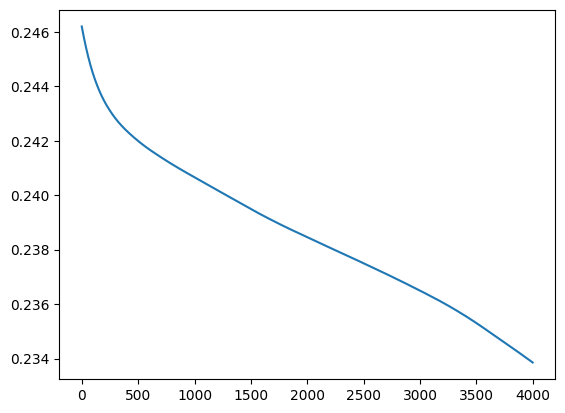

In [58]:
plt.plot(errors)

In [59]:
data_test = (np.random.rand(1000, 2) * 2)- 1
y = train(data_test, 0.0001, params, training=False)

In [60]:
y = np.where(y >= 0.5, 1, 0)

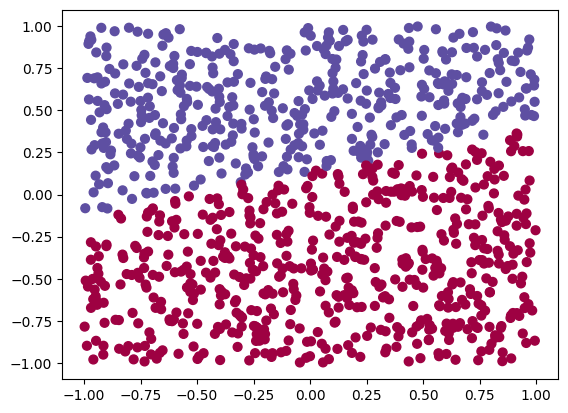

In [61]:
plt.scatter(data_test[:,0], data_test[:,1], c=y[:,0], s=40, cmap=plt.cm.Spectral)